In [1]:
import tensorflow as tf
import cv2
import numpy as np

In [2]:
(x_train, y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
x_train[1].shape

(32, 32, 3)

In [4]:
import matplotlib.pyplot as plt

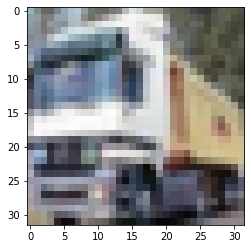

In [5]:
plt.imshow(x_train[1])
plt.show()

In [6]:
def preprocessing(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
    img=img/255
    return img

In [7]:
x_train=np.array(list(map(preprocessing,x_train)))

In [8]:
x_test=np.array(list(map(preprocessing,x_test)))

In [9]:
x_train.shape

(50000, 32, 32)

In [10]:
x_train=x_train.reshape(50000,32,32,1)
x_test=x_test.reshape(10000,32,32,1)

In [11]:
y_train.shape

(50000, 1)

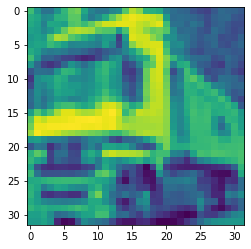

In [12]:
plt.imshow(x_train[1])
plt.show()

In [13]:
y_train[1]

array([9], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train=to_categorical(y_train)

In [16]:
y_train.shape

(50000, 10)

In [17]:
#Architecture

In [18]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [135]:
model=Sequential()
model.add(Conv2D(64,(3,3),padding="same",activation="relu",input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))


In [136]:
from tensorflow.keras.optimizers import Adam

In [137]:
model.compile(Adam(learning_rate=0.0033),loss="categorical_crossentropy",metrics=["accuracy"])

In [138]:
tf.config.run_functions_eagerly(True)

In [139]:
model.fit(x_train,y_train,epochs=40)

Epoch 1/40
   2/1563 [..............................] - ETA: 1:50 - loss: 3.1101 - accuracy: 0.0703

/opt/homebrew/Caskroom/miniforge/base/envs/tensorenv/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


 963/1563 [=================>............] - ETA: 38s - loss: 2.2718 - accuracy: 0.1911

2022-01-10 22:12:55.097906: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 960).
2022-01-10 22:12:55.098204: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 960).
2022-01-10 22:12:55.098462: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 960).
2022-01-10 22:12

 966/1563 [=================>............] - ETA: 38s - loss: 2.2710 - accuracy: 0.1913

2022-01-10 22:12:55.361090: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 964).
2022-01-10 22:12:55.361330: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 964).
2022-01-10 22:12:55.361588: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 964).
2022-01-10 22:12

 970/1563 [=================>............] - ETA: 38s - loss: 2.2699 - accuracy: 0.1915

2022-01-10 22:12:55.630451: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 968).
2022-01-10 22:12:55.630676: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 968).
2022-01-10 22:12:55.630956: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 968).
2022-01-10 22:12

 973/1563 [=================>............] - ETA: 38s - loss: 2.2691 - accuracy: 0.1917

2022-01-10 22:12:55.831695: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 971).
2022-01-10 22:12:55.833550: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 971).
2022-01-10 22:12:55.834208: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 971).
2022-01-10 22:12

 977/1563 [=================>............] - ETA: 38s - loss: 2.2680 - accuracy: 0.1919

2022-01-10 22:12:56.100170: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 975).
2022-01-10 22:12:56.100388: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 975).
2022-01-10 22:12:56.100631: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 975).
2022-01-10 22:12

 980/1563 [=================>............] - ETA: 37s - loss: 2.2672 - accuracy: 0.1920

2022-01-10 22:12:56.301705: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 978).
2022-01-10 22:12:56.302147: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 978).
2022-01-10 22:12:56.302440: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 978).
2022-01-10 22:12

 983/1563 [=================>............] - ETA: 37s - loss: 2.2664 - accuracy: 0.1922

2022-01-10 22:12:56.501848: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 981).
2022-01-10 22:12:56.502234: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 981).
2022-01-10 22:12:56.565881: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 982).
2022-01-10 22:12

 987/1563 [=================>............] - ETA: 37s - loss: 2.2654 - accuracy: 0.1924

2022-01-10 22:12:56.702310: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 984).
2022-01-10 22:12:56.702823: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 984).
2022-01-10 22:12:56.703206: W tensorflow/compiler/tf2mlcompute/convert/mlc_convert_utils.cc:690] ComputeTimeStepForAdam: Computing time_step from beta1_power and beta2_power gives different results, probably due to losing precision in pow or log. The time_step that comes from the larger beta_power is chosen (time_step = 984).
2022-01-10 22:12

1563/1563 [==============================] - 102s 65ms/step - loss: 2.1470 - accuracy: 0.2193
Epoch 2/40
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5238 - accuracy: 0.4352
Epoch 3/40
1563/1563 [==============================] - 101s 65ms/step - loss: 1.1725 - accuracy: 0.5878
Epoch 4/40
1563/1563 [==============================] - 109s 69ms/step - loss: 0.9677 - accuracy: 0.6712
Epoch 5/40
1563/1563 [==============================] - 101s 65ms/step - loss: 0.8342 - accuracy: 0.7185
Epoch 6/40
1563/1563 [==============================] - 101s 65ms/step - loss: 0.7571 - accuracy: 0.7465
Epoch 7/40
1563/1563 [==============================] - 101s 65ms/step - loss: 0.6870 - accuracy: 0.7695
Epoch 8/40
1563/1563 [==============================] - 101s 65ms/step - loss: 0.6125 - accuracy: 0.7949
Epoch 9/40
1563/1563 [==============================] - 101s 65ms/step - loss: 0.5464 - accuracy: 0.8183
Epoch 10/40
1563/1563 [==============================] - 102s 65ms

In [140]:
print("training accuracy-> ",95.40)

training accuracy->  95.4


In [141]:
model_in_json=model.to_json()

In [142]:
file=open("/Users/akshaykumar/Documents/ml/dataset_best.json","w")
file.write(model_in_json)
file.close()

In [143]:
model.save_weights("/Users/akshaykumar/Documents/ml/weights_best.h5")

In [144]:
#loading saved model

In [145]:
from tensorflow.keras.models import model_from_json

In [146]:
file=open("/Users/akshaykumar/Documents/ml/dataset_best.json","r")
loaded_data=file.read()
loaded_model=model_from_json(loaded_data)
loaded_model.load_weights("/Users/akshaykumar/Documents/ml/weights_best.h5")

In [147]:
pred=loaded_model.predict(x_test)

In [148]:
pred.shape

(10000, 10)

In [149]:
pred=np.argmax(pred,axis=1)

In [150]:
pred.shape

(10000,)

In [151]:
y_test.shape

(10000, 1)

In [152]:
y_train.shape

(50000, 10)

In [153]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)


In [154]:
print("Testing accuracy->",str(round(accuracy*100,2))+"%")

Testing accuracy-> 71.51%


In [155]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 4, 4, 256)       